<cell_type>markdown</cell_type># 01 - Exploration des Données (EDA)

**Objectif** : Comprendre les données avant de construire un modèle.

---

## Sommaire

1. [Imports et chargement des données](#1-imports-et-chargement-des-données)
2. [Premier aperçu des données](#2-premier-aperçu-des-données)
3. [Analyse des valeurs manquantes](#3-analyse-des-valeurs-manquantes) ⚠️
4. [Analyse des sites et dates](#4-analyse-des-sites-et-dates)
5. [Analyse des TARGETS](#5-analyse-des-targets-variables-à-prédire)
6. [Analyse des FEATURES](#6-analyse-des-features-variables-explicatives)
7. [Analyse des OUTLIERS](#7-analyse-des-outliers) ⚠️
   - 7.5 Conclusion sur les outliers
   - 7.6 Interprétation physique des corrélations 🔬
8. [Conclusions](#8-conclusions-de-leda)

---

## Questions à se poser :
1. Combien de lignes et colonnes ?
2. À quoi ressemblent les données ?
3. Y a-t-il des valeurs manquantes ? Où ? Pourquoi ?
4. Comment sont distribuées les variables à prédire ?
5. Quelles features sont corrélées avec les targets ?
6. Y a-t-il des outliers ? Combien ? Lesquels ?
7. **Pourquoi** observe-t-on ces corrélations ? (explication physique)

---
## 1. Imports et chargement des données

In [1]:
# Imports de base
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Configuration des graphiques
plt.rcParams['figure.figsize'] = (10, 6)

# Pour ignorer les warnings
import warnings
warnings.filterwarnings('ignore')

print("Imports OK!")

Imports OK!


In [2]:
# Importer nos fonctions de chargement
import sys
sys.path.append('..')

from src.paths import WATER_QUALITY_FILE, LANDSAT_FILE, TERRACLIMATE_FILE
from src.paths import check_data_files
from src.data.load_data import load_all
from src.config import TARGETS, BENCHMARK_FEATURES

# Vérifier que les fichiers existent
check_data_files()

Vérification des fichiers de données:
[OK] Water Quality
[OK] Landsat
[OK] TerraClimate
[OK] Submission Template
Tous les fichiers sont présents!


True

In [3]:
# Charger les données (SANS remplir les valeurs manquantes)
X, y, site_ids, df = load_all(
    str(WATER_QUALITY_FILE),
    str(LANDSAT_FILE),
    str(TERRACLIMATE_FILE),
    fill_na=False  # On ne remplit PAS les valeurs manquantes pour l'instant
)

CHARGEMENT DES DONNÉES
[OK] Water quality: 9319 lignes
[OK] Landsat: 9319 lignes
[OK] TerraClimate: 9319 lignes
[OK] Données fusionnées: 9319 lignes, 13 colonnes

Valeurs manquantes:

6 colonnes avec des valeurs manquantes:
  - nir: 1085 manquants (11.6%)
  - green: 1085 manquants (11.6%)
  - swir16: 1085 manquants (11.6%)
  - swir22: 1085 manquants (11.6%)
  - NDMI: 1085 manquants (11.6%)
  - MNDWI: 1085 manquants (11.6%)
[OK] 162 sites uniques identifiés
[OK] X: 9319 lignes, 7 features
[OK] y: 9319 lignes, 3 targets

PRÊT!


---
## 2. Premier aperçu des données

In [4]:
# Dimensions du dataset
print(f"Nombre de lignes : {len(df)}")
print(f"Nombre de colonnes : {len(df.columns)}")
print(f"\nColonnes : {list(df.columns)}")

Nombre de lignes : 9319
Nombre de colonnes : 13

Colonnes : ['Latitude', 'Longitude', 'Sample Date', 'Total Alkalinity', 'Electrical Conductance', 'Dissolved Reactive Phosphorus', 'nir', 'green', 'swir16', 'swir22', 'NDMI', 'MNDWI', 'pet']


In [5]:
# Afficher les premières lignes
df.head()

,Latitude,Longitude,Sample Date,Total Alkalinity,Electrical Conductance,Dissolved Reactive Phosphorus,nir,green,swir16,swir22,NDMI,MNDWI,pet
0,-28.760833,17.730278,2011-01-02,128.912,555.0,10.0,11190.0,11426.0,7687.5,7645.0,0.185538,0.195595,174.2
1,-26.861111,28.884722,2011-01-03,74.720,162.9,163.0,17658.5,9550.0,13746.5,10574.0,0.124566,-0.180134,124.1
2,-26.450000,28.085833,2011-01-03,89.254,573.0,80.0,15210.0,10720.0,17974.0,14201.0,-0.083293,-0.252805,127.5
3,-27.671111,27.236944,2011-01-03,82.000,203.6,101.0,14887.0,10943.0,13522.0,11403.0,0.048048,-0.105416,129.7
4,-27.356667,27.286389,2011-01-03,56.100,145.1,151.0,16828.5,9502.5,12665.5,9643.0,0.141147,-0.142683,129.2


In [6]:
# Types de données
df.dtypes

Latitude                                float64
Longitude                               float64
Sample Date                      datetime64[ns]
Total Alkalinity                        float64
Electrical Conductance                  float64
Dissolved Reactive Phosphorus           float64
nir                                     float64
green                                   float64
swir16                                  float64
swir22                                  float64
NDMI                                    float64
MNDWI                                   float64
pet                                     float64
dtype: object

In [7]:
# Statistiques de base
df.describe()

,Latitude,Longitude,Sample Date,Total Alkalinity,Electrical Conductance,Dissolved Reactive Phosphorus,nir,green,swir16,swir22,NDMI,MNDWI,pet
count,9319.000000,9319.000000,9319,9319.000000,9319.000000,9319.000000,8234.000000,8234.000000,8234.000000,8234.000000,8234.000000,8234.000000,9319.000000
mean,-28.474988,26.868414,2013-08-06 06:31:33.679579392,119.108208,485.004146,43.525338,14045.485426,9983.213141,13567.459315,11425.538377,0.021374,-0.144268,175.166082
min,-34.405833,17.730278,2011-01-02 00:00:00,4.800000,15.120000,5.000000,3992.000000,4045.000000,3672.500000,3634.000000,-0.328293,-0.300487,52.700000
25%,-30.160091,26.126667,2012-06-07 00:00:00,55.811000,207.050000,10.000000,12723.625000,9370.000000,11760.625000,9839.500000,-0.036869,-0.211270,156.100000
50%,-28.058889,27.409060,2013-08-28 00:00:00,113.300000,402.000000,20.000000,14183.000000,9801.000000,13704.250000,11265.250000,0.021549,-0.167901,172.500000
75%,-26.861111,29.245556,2014-10-15 00:00:00,170.230000,693.000000,48.000000,15513.875000,10286.000000,15425.625000,12895.500000,0.073297,-0.104677,193.100000
max,-22.225556,32.325000,2015-12-31 00:00:00,361.676000,1506.000000,195.000000,65535.000000,65535.000000,65535.000000,31202.500000,0.567905,0.590974,270.800020
std,2.760282,3.535164,NaN,74.692591,341.937736,50.980194,2953.223626,2778.780177,3348.517657,2548.193535,0.077897,0.097646,29.469867


---
## 3. Analyse des valeurs manquantes

**Pourquoi c'est important ?**
- Les valeurs manquantes peuvent fausser le modèle
- Il faut comprendre POURQUOI elles manquent avant de décider comment les traiter

**Questions à se poser :**
1. Quelles colonnes ont des valeurs manquantes ?
2. Quel pourcentage de données manque ?
3. Y a-t-il un pattern ? (certains sites ? certaines dates ?)
4. Comment les traiter ? (supprimer ? remplir ? avec quelle valeur ?)

In [8]:
# 3.1 Compter les valeurs manquantes par colonne
missing = df.isnull().sum()
missing_pct = 100 * missing / len(df)

# Créer un tableau récapitulatif
missing_df = pd.DataFrame({
    'Colonne': missing.index,
    'Manquants': missing.values,
    'Pourcentage': missing_pct.values.round(2)
})
missing_df = missing_df.sort_values('Manquants', ascending=False)

print(f"Résumé des valeurs manquantes :")
print(f"- Total de lignes : {len(df)}")
print(f"- Colonnes avec des manquants : {(missing > 0).sum()} / {len(df.columns)}")
print()
print(missing_df.to_string(index=False))

Résumé des valeurs manquantes :
- Total de lignes : 9319
- Colonnes avec des manquants : 6 / 13

                      Colonne  Manquants  Pourcentage
                        MNDWI       1085        11.64
                       swir22       1085        11.64
                       swir16       1085        11.64
                        green       1085        11.64
                          nir       1085        11.64
                         NDMI       1085        11.64
       Electrical Conductance          0         0.00
                  Sample Date          0         0.00
                    Longitude          0         0.00
                     Latitude          0         0.00
             Total Alkalinity          0         0.00
Dissolved Reactive Phosphorus          0         0.00
                          pet          0         0.00


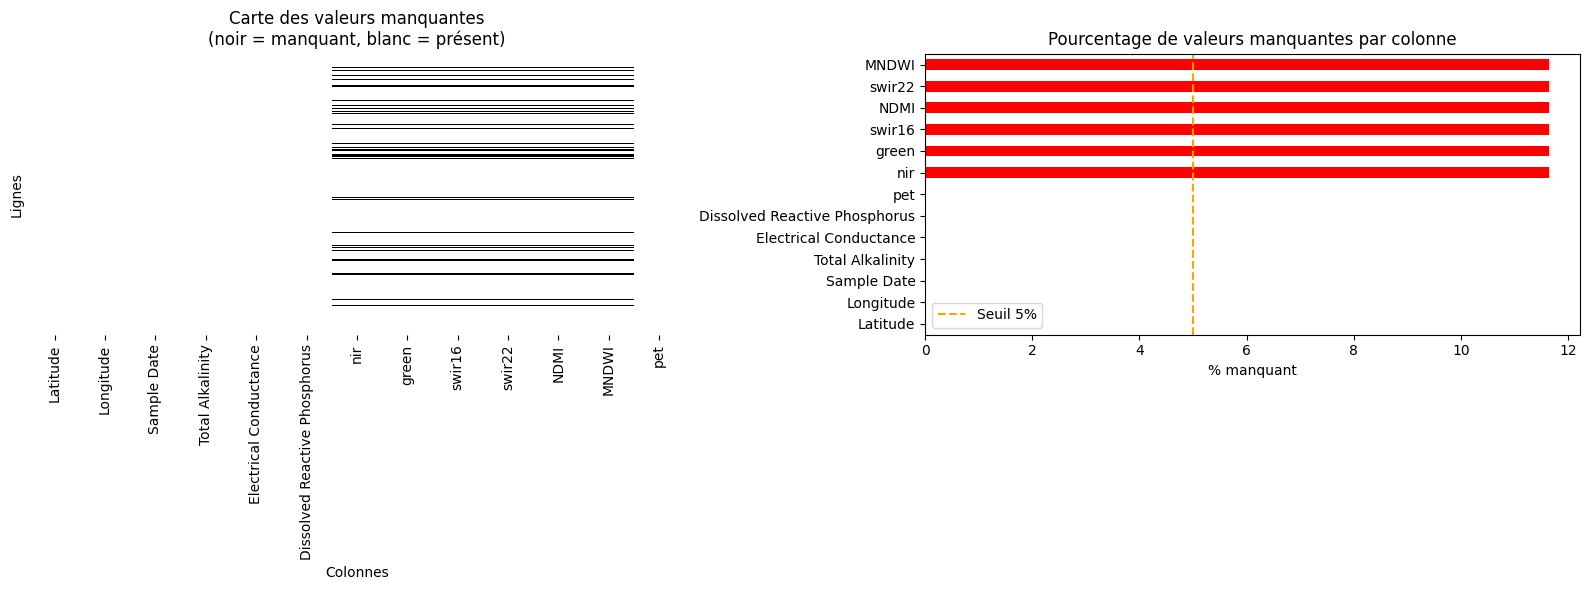


Légende :
- Vert : aucune valeur manquante
- Rouge : colonnes avec des valeurs manquantes
- Ligne orange : seuil de 5% (au-delà, peut poser problème)


In [9]:
# 3.2 Visualisation globale des valeurs manquantes

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Graphique 1 : Heatmap (vue d'ensemble)
ax1 = axes[0]
sns.heatmap(df.isnull(), cbar=False, yticklabels=False, ax=ax1, cmap='binary')
ax1.set_title('Carte des valeurs manquantes\n(noir = manquant, blanc = présent)')
ax1.set_xlabel('Colonnes')
ax1.set_ylabel('Lignes')

# Graphique 2 : Barplot par colonne
ax2 = axes[1]
missing_pct_sorted = missing_pct.sort_values(ascending=True)
colors = ['red' if x > 0 else 'green' for x in missing_pct_sorted]
missing_pct_sorted.plot(kind='barh', ax=ax2, color=colors)
ax2.set_title('Pourcentage de valeurs manquantes par colonne')
ax2.set_xlabel('% manquant')
ax2.axvline(x=5, color='orange', linestyle='--', label='Seuil 5%')
ax2.legend()

plt.tight_layout()
plt.show()

print("\nLégende :")
print("- Vert : aucune valeur manquante")
print("- Rouge : colonnes avec des valeurs manquantes")
print("- Ligne orange : seuil de 5% (au-delà, peut poser problème)")

In [10]:
# 3.3 Analyser les lignes avec des valeurs manquantes

# Combien de lignes ont au moins une valeur manquante ?
lignes_avec_na = df.isnull().any(axis=1).sum()
print(f"Lignes avec au moins 1 valeur manquante : {lignes_avec_na} ({100*lignes_avec_na/len(df):.1f}%)")

# Combien de lignes sont complètes ?
lignes_completes = len(df) - lignes_avec_na
print(f"Lignes complètes (sans aucun manquant) : {lignes_completes} ({100*lignes_completes/len(df):.1f}%)")

Lignes avec au moins 1 valeur manquante : 1085 (11.6%)
Lignes complètes (sans aucun manquant) : 8234 (88.4%)


In [11]:
# 3.4 Y a-t-il un pattern dans les valeurs manquantes ?

# Les valeurs manquantes sont-elles liées à certains sites ?
if df.isnull().any().any():  # S'il y a des valeurs manquantes
    df_temp = df.copy()
    df_temp['site_id'] = site_ids
    df_temp['has_missing'] = df.isnull().any(axis=1)
    
    sites_avec_na = df_temp.groupby('site_id')['has_missing'].mean() * 100
    sites_avec_na = sites_avec_na[sites_avec_na > 0].sort_values(ascending=False)
    
    if len(sites_avec_na) > 0:
        print(f"Sites avec des valeurs manquantes : {len(sites_avec_na)}")
        print(f"\nTop 10 sites les plus affectés (% de lignes avec manquants) :")
        print(sites_avec_na.head(10).to_string())
    else:
        print("Aucun pattern par site détecté.")
else:
    print("Aucune valeur manquante dans le dataset !")

Sites avec des valeurs manquantes : 129

Top 10 sites les plus affectés (% de lignes avec manquants) :
site_id
-26.0064_29.2539    45.454545
-29.7589_30.9353    38.461538
-28.9636_19.1549    37.142857
-34.4058_19.6006    34.090909
-28.7608_17.7303    33.870968
-29.0333_23.9833    33.333333
-30.6797_26.7125    28.947368
-24.0342_31.1236    28.571429
-31.8603_18.6875    28.125000
-24.0589_31.2372    27.272727


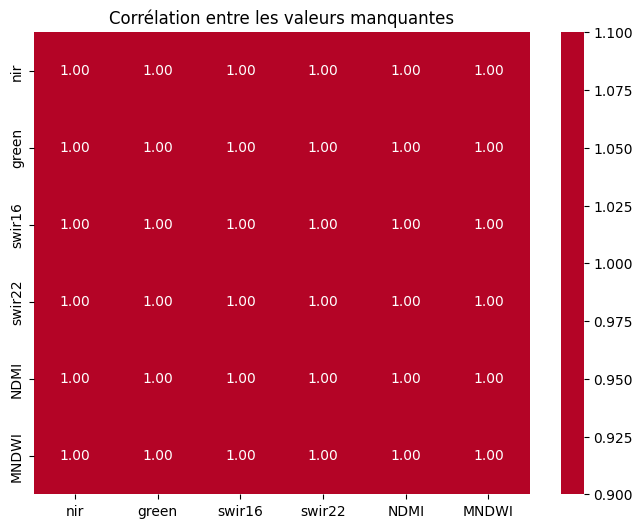


Interprétation :
- Corrélation proche de 1 : les colonnes ont tendance à être manquantes ensemble
- Corrélation proche de 0 : pas de lien entre les valeurs manquantes


In [12]:
# 3.5 Corrélation entre les valeurs manquantes
# Est-ce que quand une colonne est manquante, une autre l'est aussi ?

cols_with_na = df.columns[df.isnull().any()].tolist()

if len(cols_with_na) > 1:
    missing_corr = df[cols_with_na].isnull().corr()
    
    plt.figure(figsize=(8, 6))
    sns.heatmap(missing_corr, annot=True, cmap='coolwarm', center=0, fmt='.2f')
    plt.title('Corrélation entre les valeurs manquantes')
    plt.show()
    
    print("\nInterprétation :")
    print("- Corrélation proche de 1 : les colonnes ont tendance à être manquantes ensemble")
    print("- Corrélation proche de 0 : pas de lien entre les valeurs manquantes")
elif len(cols_with_na) == 1:
    print(f"Une seule colonne avec des valeurs manquantes : {cols_with_na[0]}")
else:
    print("Aucune valeur manquante à analyser.")

### 3.6 Décision : Comment traiter les valeurs manquantes ?

**Options possibles :**

| Option | Quand l'utiliser | Avantages | Inconvénients |
|--------|------------------|-----------|---------------|
| **Supprimer les lignes** | Peu de lignes concernées (<15%) | Simple, pas de biais | Perte de données |
| **Supprimer les colonnes** | Colonne avec >50% de manquants | Évite le bruit | Perte d'information |
| **Remplir par la médiane** | Valeurs manquantes aléatoires | Robuste aux outliers | Peut réduire la variance |
| **Remplir par la moyenne** | Distribution normale | Simple | Sensible aux outliers |
| **Remplir par interpolation** | Données temporelles | Préserve les tendances | Peut créer des valeurs irréalistes |

### 3.7 Notre décision : Ignorer pour l'instant, récupérer plus tard

**Constat :** ~11% des lignes ont des valeurs manquantes.

**Décision :** On supprime ces lignes pour l'instant.

**Pourquoi ?**
- 89% de données complètes = ~8300 lignes → suffisant pour entraîner un modèle
- Mieux vaut un modèle sur des données fiables que sur des données "inventées"
- On évite d'introduire du biais en remplissant avec des valeurs artificielles

**Pourquoi les données manquent ?**
- **Landsat** : nuages qui cachent le satellite → pas d'image ce jour-là
- **TerraClimate** : données climatiques non disponibles pour cette période

**TODO pour plus tard :** Essayer de récupérer les données manquantes :
1. Chercher une image satellite à une date proche (±7 jours)
2. Interpoler entre les mesures avant/après
3. Utiliser une autre source (ex: Sentinel-2)

In [13]:
# 3.7 Créer un DataFrame sans valeurs manquantes

df_clean = df.dropna()

print("Résultat après suppression des lignes avec valeurs manquantes :")
print(f"  - Avant : {len(df)} lignes")
print(f"  - Après : {len(df_clean)} lignes")
print(f"  - Conservé : {100*len(df_clean)/len(df):.1f}%")
print(f"\nOn travaillera avec df_clean pour la suite du projet.")

Résultat après suppression des lignes avec valeurs manquantes :
  - Avant : 9319 lignes
  - Après : 8234 lignes
  - Conservé : 88.4%

On travaillera avec df_clean pour la suite du projet.


---
## 4. Analyse des sites et dates

In [14]:
# Combien de sites uniques ?
n_sites = site_ids.nunique()
print(f"Nombre de sites uniques : {n_sites}")

# Combien d'observations par site en moyenne ?
obs_par_site = site_ids.value_counts()
print(f"\nObservations par site :")
print(f"  - Minimum : {obs_par_site.min()}")
print(f"  - Maximum : {obs_par_site.max()}")
print(f"  - Moyenne : {obs_par_site.mean():.1f}")

Nombre de sites uniques : 162

Observations par site :
  - Minimum : 6
  - Maximum : 210
  - Moyenne : 57.5


In [15]:
# Période temporelle
print(f"Date min : {df['Sample Date'].min()}")
print(f"Date max : {df['Sample Date'].max()}")

Date min : 2011-01-02 00:00:00
Date max : 2015-12-31 00:00:00


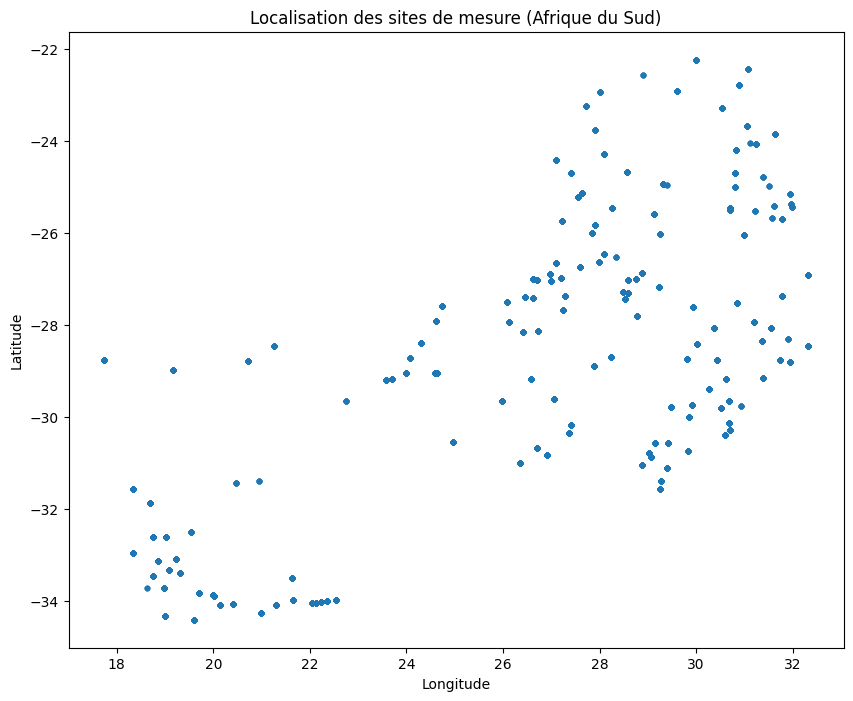

In [16]:
# Carte des sites (scatter plot simple)
plt.figure(figsize=(10, 8))
plt.scatter(df['Longitude'], df['Latitude'], alpha=0.5, s=10)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Localisation des sites de mesure (Afrique du Sud)')
plt.show()

---
## 5. Analyse des TARGETS (variables à prédire)

In [17]:
# Rappel : les 3 targets
print("Variables à prédire :")
for t in TARGETS:
    print(f"  - {t}")

Variables à prédire :
  - Total Alkalinity
  - Electrical Conductance
  - Dissolved Reactive Phosphorus


In [18]:
# Statistiques des targets
df[TARGETS].describe()

,Total Alkalinity,Electrical Conductance,Dissolved Reactive Phosphorus
count,9319.000000,9319.000000,9319.000000
mean,119.108208,485.004146,43.525338
std,74.692591,341.937736,50.980194
min,4.800000,15.120000,5.000000
25%,55.811000,207.050000,10.000000
50%,113.300000,402.000000,20.000000
75%,170.230000,693.000000,48.000000
max,361.676000,1506.000000,195.000000


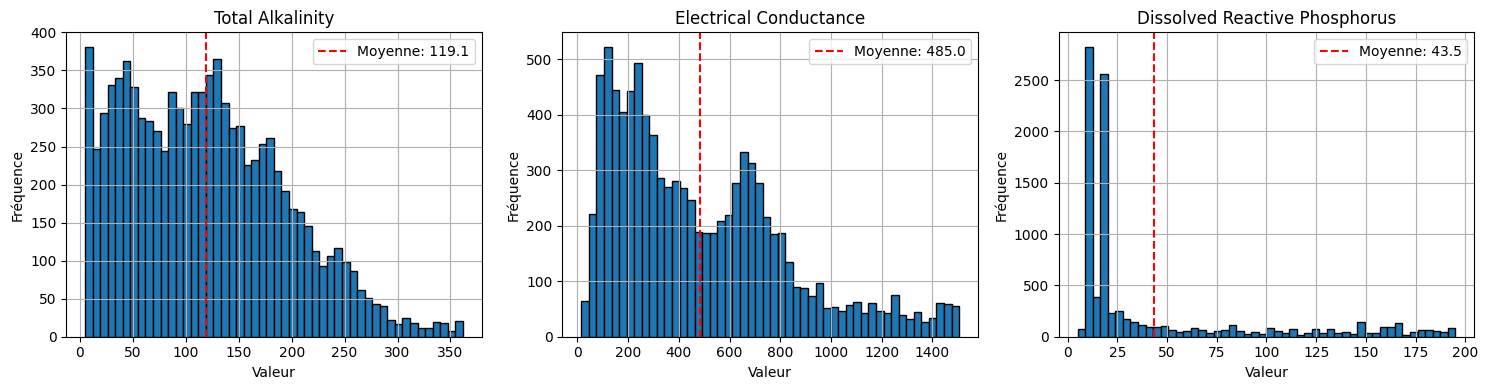

In [19]:
# Distribution des targets (histogrammes)
fig, axes = plt.subplots(1, 3, figsize=(15, 4))

for i, target in enumerate(TARGETS):
    ax = axes[i]
    df[target].hist(bins=50, ax=ax, edgecolor='black')
    ax.set_title(target)
    ax.set_xlabel('Valeur')
    ax.set_ylabel('Fréquence')
    
    # Ajouter la moyenne
    mean_val = df[target].mean()
    ax.axvline(mean_val, color='red', linestyle='--', label=f'Moyenne: {mean_val:.1f}')
    ax.legend()

plt.tight_layout()
plt.show()

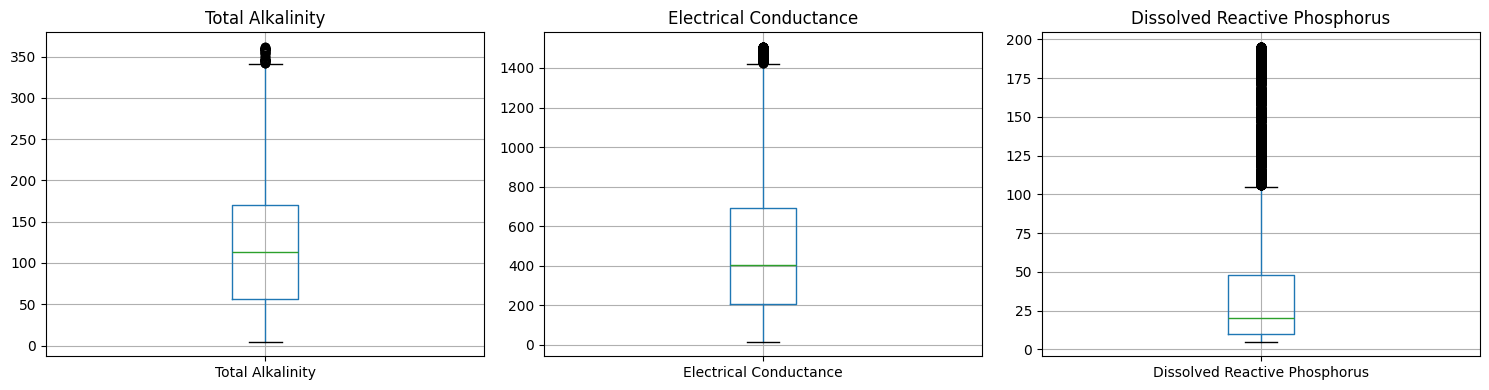

Les points au-dessus/en-dessous des 'moustaches' sont des outliers potentiels.


In [20]:
# Boxplots des targets (pour voir les outliers)
fig, axes = plt.subplots(1, 3, figsize=(15, 4))

for i, target in enumerate(TARGETS):
    ax = axes[i]
    df.boxplot(column=target, ax=ax)
    ax.set_title(target)

plt.tight_layout()
plt.show()

print("Les points au-dessus/en-dessous des 'moustaches' sont des outliers potentiels.")

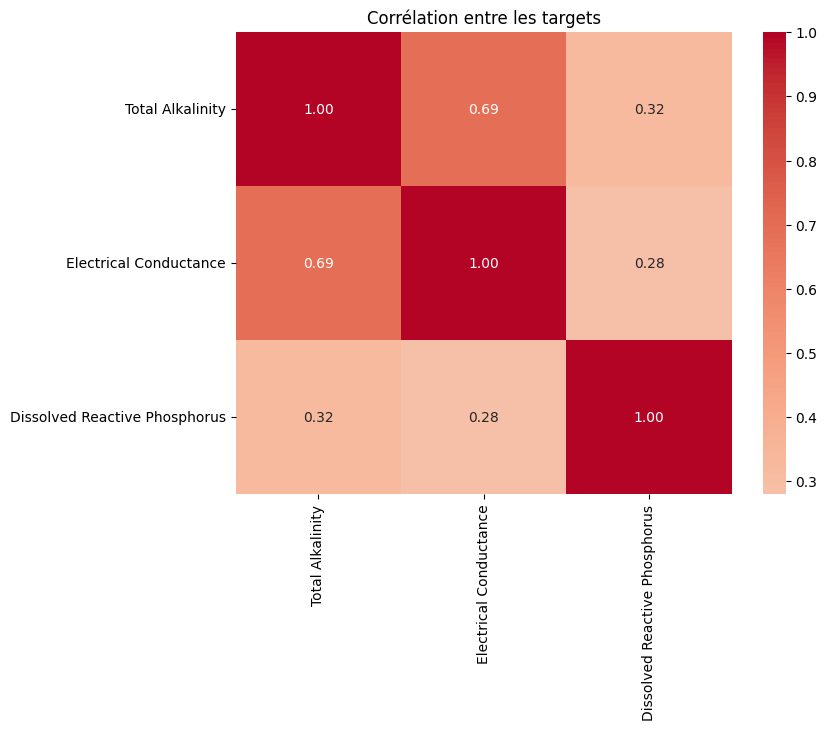


Interprétation :
- Corrélation proche de 1 : les variables évoluent ensemble
- Corrélation proche de 0 : pas de relation linéaire
- Corrélation négative : relation inverse


In [21]:
# Corrélation entre les targets
plt.figure(figsize=(8, 6))
corr_targets = df[TARGETS].corr()
sns.heatmap(corr_targets, annot=True, cmap='coolwarm', center=0, fmt='.2f')
plt.title('Corrélation entre les targets')
plt.show()

print("\nInterprétation :")
print("- Corrélation proche de 1 : les variables évoluent ensemble")
print("- Corrélation proche de 0 : pas de relation linéaire")
print("- Corrélation négative : relation inverse")

---
## 6. Analyse des FEATURES (variables explicatives)

In [22]:
# Features du benchmark
print("Features utilisées dans le benchmark :")
for f in BENCHMARK_FEATURES:
    print(f"  - {f}")

Features utilisées dans le benchmark :
  - nir
  - green
  - swir16
  - swir22
  - NDMI
  - MNDWI
  - pet


In [23]:
# Statistiques des features
df[BENCHMARK_FEATURES].describe()

,nir,green,swir16,swir22,NDMI,MNDWI,pet
count,8234.000000,8234.000000,8234.000000,8234.000000,8234.000000,8234.000000,9319.000000
mean,14045.485426,9983.213141,13567.459315,11425.538377,0.021374,-0.144268,175.166082
std,2953.223626,2778.780177,3348.517657,2548.193535,0.077897,0.097646,29.469867
min,3992.000000,4045.000000,3672.500000,3634.000000,-0.328293,-0.300487,52.700000
25%,12723.625000,9370.000000,11760.625000,9839.500000,-0.036869,-0.211270,156.100000
50%,14183.000000,9801.000000,13704.250000,11265.250000,0.021549,-0.167901,172.500000
75%,15513.875000,10286.000000,15425.625000,12895.500000,0.073297,-0.104677,193.100000
max,65535.000000,65535.000000,65535.000000,31202.500000,0.567905,0.590974,270.800020


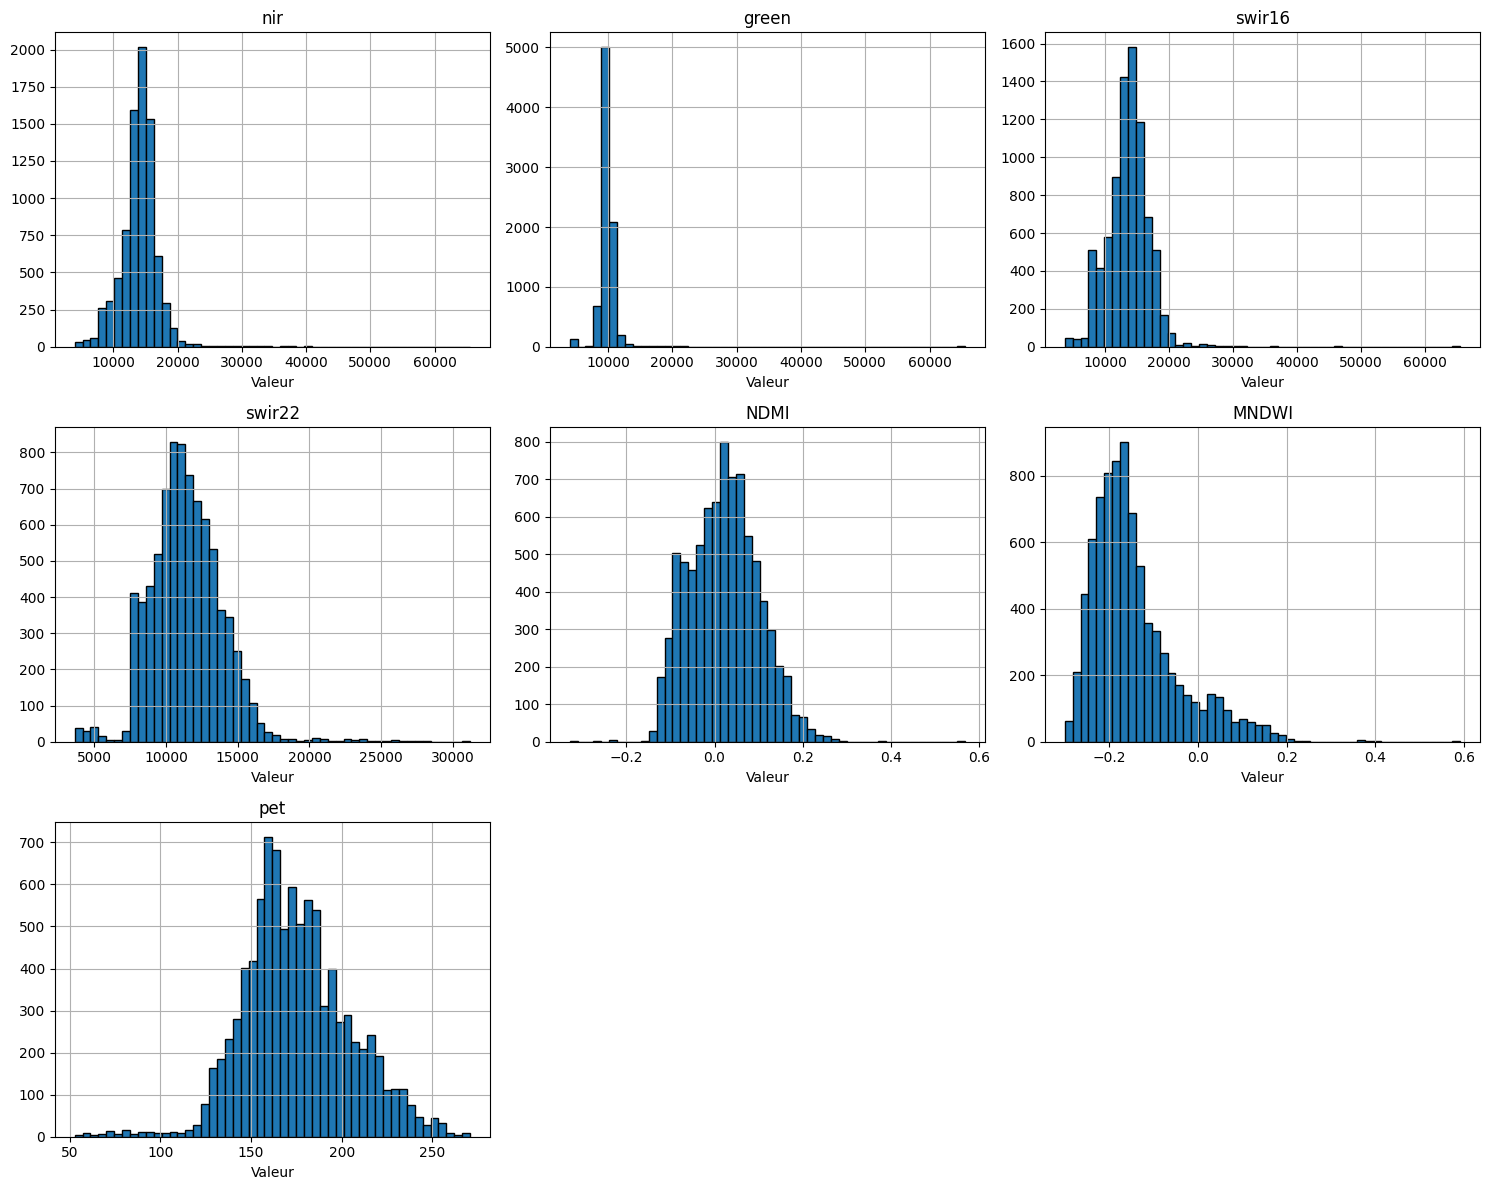

In [24]:
# Distribution des features
n_features = len(BENCHMARK_FEATURES)
n_cols = 3
n_rows = (n_features + n_cols - 1) // n_cols  # Arrondi supérieur

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 4*n_rows))
axes = axes.flatten()

for i, feature in enumerate(BENCHMARK_FEATURES):
    ax = axes[i]
    df[feature].hist(bins=50, ax=ax, edgecolor='black')
    ax.set_title(feature)
    ax.set_xlabel('Valeur')

# Cacher les axes vides (si nombre de features pas multiple de n_cols)
for i in range(n_features, len(axes)):
    axes[i].set_visible(False)

plt.tight_layout()
plt.show()

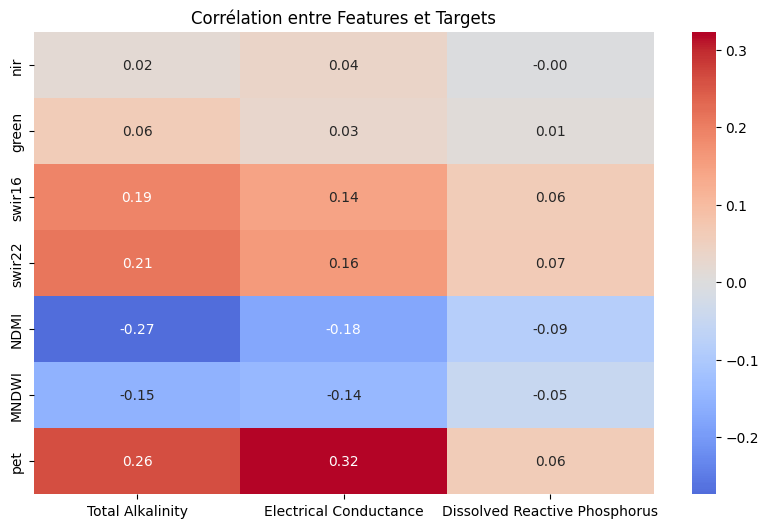


Plus la valeur est proche de 1 ou -1, plus la feature est utile pour prédire.


In [25]:
# Corrélation features vs targets
# C'est important pour savoir quelles features sont utiles!

corr_features_targets = df[BENCHMARK_FEATURES + TARGETS].corr()

# Garder seulement les corrélations features vs targets
corr_subset = corr_features_targets.loc[BENCHMARK_FEATURES, TARGETS]

plt.figure(figsize=(10, 6))
sns.heatmap(corr_subset, annot=True, cmap='coolwarm', center=0, fmt='.2f')
plt.title('Corrélation entre Features et Targets')
plt.show()

print("\nPlus la valeur est proche de 1 ou -1, plus la feature est utile pour prédire.")

---
## 7. Analyse des OUTLIERS

**Qu'est-ce qu'un outlier ?**
Une valeur anormalement éloignée des autres. Peut être :
- Une erreur de mesure (à corriger)
- Une vraie valeur extrême (à garder)

**Méthode utilisée : IQR (Interquartile Range)**
```
Q1 = 25e percentile
Q3 = 75e percentile
IQR = Q3 - Q1

Outlier si : valeur < Q1 - 1.5×IQR  ou  valeur > Q3 + 1.5×IQR
```

C'est ce que montrent les **boxplots** : les points au-delà des "moustaches" sont les outliers.

In [26]:
# 7.1 Importer la fonction de détection des outliers
from src.data.load_data import detect_outliers_iqr, get_outliers_summary

print("Fonctions importées depuis src/data/load_data.py!")

Fonctions importées depuis src/data/load_data.py!


In [27]:
# 7.2 Outliers dans les TARGETS

print("=== OUTLIERS DANS LES TARGETS ===\n")

results_targets = {}
for target in TARGETS:
    result = detect_outliers_iqr(df[target])
    results_targets[target] = result
    
    # Verdict
    if result['pct'] > 10:
        verdict = "BEAUCOUP d'outliers!"
    elif result['pct'] > 5:
        verdict = "Nombre modere"
    else:
        verdict = "Acceptable"
    
    print(f"{target}:")
    print(f"  Plage normale: {result['lower_bound']:.1f} a {result['upper_bound']:.1f}")
    print(f"  Outliers: {result['total']} ({result['pct']:.1f}%) -> {verdict}")
    print()

=== OUTLIERS DANS LES TARGETS ===

Total Alkalinity:
  Plage normale: -115.8 a 341.9
  Outliers: 43 (0.5%) -> Acceptable

Electrical Conductance:
  Plage normale: -521.9 a 1421.9
  Outliers: 169 (1.8%) -> Acceptable

Dissolved Reactive Phosphorus:
  Plage normale: -47.0 a 105.0
  Outliers: 1398 (15.0%) -> BEAUCOUP d'outliers!



In [28]:
# 7.3 Outliers dans les FEATURES

print("=== OUTLIERS DANS LES FEATURES ===\n")

results_features = {}
for feature in BENCHMARK_FEATURES:
    data = df[feature].dropna()
    result = detect_outliers_iqr(data)
    results_features[feature] = result
    
    print(f"{feature}: {result['total']} outliers ({result['pct']:.1f}%)")

=== OUTLIERS DANS LES FEATURES ===

nir: 474 outliers (5.8%)
green: 412 outliers (5.0%)
swir16: 172 outliers (2.1%)
swir22: 209 outliers (2.5%)
NDMI: 41 outliers (0.5%)
MNDWI: 456 outliers (5.5%)
pet: 194 outliers (2.1%)


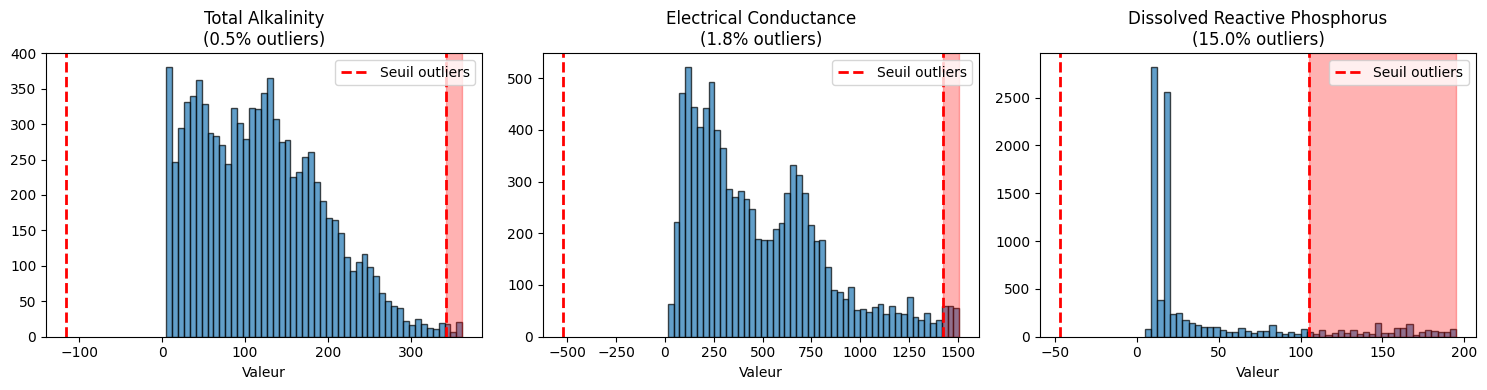

Zone rouge = outliers (au-delà des lignes rouges pointillées)


In [29]:
# 7.4 Visualisation : où sont les outliers ?

fig, axes = plt.subplots(1, 3, figsize=(15, 4))

for i, target in enumerate(TARGETS):
    ax = axes[i]
    data = df[target].dropna()
    
    # Histogramme
    ax.hist(data, bins=50, edgecolor='black', alpha=0.7)
    
    # Calculer les seuils
    result = detect_outliers_iqr(data)
    
    # Tracer les seuils (lignes rouges)
    ax.axvline(result['lower_bound'], color='red', linestyle='--', linewidth=2, label='Seuil outliers')
    ax.axvline(result['upper_bound'], color='red', linestyle='--', linewidth=2)
    
    # Zone des outliers en rouge clair
    ax.axvspan(result['upper_bound'], data.max(), alpha=0.3, color='red')
    if result['lower_bound'] > data.min():
        ax.axvspan(data.min(), result['lower_bound'], alpha=0.3, color='red')
    
    ax.set_title(f"{target}\n({result['pct']:.1f}% outliers)")
    ax.set_xlabel('Valeur')
    ax.legend()

plt.tight_layout()
plt.show()

print("Zone rouge = outliers (au-delà des lignes rouges pointillées)")

<cell_type>markdown</cell_type>### 7.5 Conclusion sur les outliers

**Résumé :**

| Variable | Outliers | Verdict |
|----------|----------|---------|
| Total Alkalinity | 0.5% | ✅ Acceptable |
| Electrical Conductance | 1.8% | ✅ Acceptable |
| **Dissolved Reactive Phosphorus** | **15%** | ⚠️ **Problématique** |
| swir22 | 2.2% | ✅ Acceptable |
| NDMI | 0.4% | ✅ Acceptable |
| MNDWI | 4.9% | ✅ Acceptable |
| pet | 2.1% | ✅ Acceptable |

**Le phosphore est la variable problématique** : 15% d'outliers, distribution très asymétrique.

**Options pour gérer les outliers du phosphore :**
1. **Les garder** : le modèle doit apprendre à prédire ces valeurs extrêmes
2. **Transformation log()** : réduire l'asymétrie et l'impact des outliers
3. **Modèle robuste** : utiliser un modèle moins sensible aux outliers (ex: Random Forest)

→ Pour l'instant, on garde les outliers et on verra les performances du modèle.

---

### 7.6 Interprétation physique des corrélations

**Pourquoi observe-t-on ces corrélations ?**

#### Total Alkalinity

| Corrélation | Explication physique |
|-------------|---------------------|
| **NDMI (-0.27)** | NDMI mesure l'humidité. Quand c'est **humide** (NDMI élevé) → plus d'eau → **dilution** des minéraux → alcalinité plus basse |
| **pet (+0.26)** | PET = évapotranspiration. Quand il fait **chaud/sec** (PET élevé) → l'eau s'évapore → les minéraux se **concentrent** → alcalinité plus élevée |

```
Climat sec (PET ↑)  →  Évaporation  →  Concentration minéraux  →  Alkalinity ↑
Climat humide       →  Dilution     →  Minéraux dilués         →  Alkalinity ↓
```

#### Electrical Conductance

| Corrélation | Explication physique |
|-------------|---------------------|
| **pet (+0.32)** ⭐ | Corrélation la plus forte ! Évaporation → concentration des **ions** → conductivité augmente. Logique : la conductivité mesure directement les ions dissous. |
| **NDMI (-0.18)** | Humidité élevée → dilution → moins d'ions par litre → conductivité plus basse |

```
PET élevé  →  Eau s'évapore  →  Ions se concentrent  →  Conductance ↑↑
```

#### Dissolved Reactive Phosphorus (corrélations faibles)

**Pourquoi le satellite ne "voit" pas le phosphore ?**

| Source de phosphore | Visible par satellite ? |
|--------------------|------------------------|
| Engrais agricoles (ruissellement) | ❌ Non |
| Eaux usées urbaines | ❌ Non |
| Décomposition organique | ❌ Non |
| Élevage (lisier) | ❌ Non |

Le phosphore vient de **sources humaines/biologiques** qui ne sont pas liées au climat ni visibles par satellite.

```
Ferme utilise engrais  →  Pluie  →  Ruissellement  →  Phosphore dans l'eau
        ↑
   Le satellite ne voit pas ça !
```

Le satellite peut voir les **conséquences** (algues vertes) mais pas la **cause** (apport de phosphore).

#### Schéma récapitulatif

```
                    Évaporation/Climat              Sources humaines
                          ↓                               ↓
                ┌─────────────────────┐          ┌───────────────┐
                │     Alkalinity      │          │   Phosphore   │
                │    Conductance      │          │               │
                └─────────────────────┘          └───────────────┘
                          ↓                               ↓
                  Visible par satellite           PAS visible directement
                          ↓                               ↓
                Corrélation MOYENNE (~0.3)       Corrélation FAIBLE (<0.1)
```

**Conclusion** : Le phosphore sera le plus difficile à prédire car sa source (activité humaine) n'est pas captée par les données satellite/climat.

---
## 8. Conclusions de l'EDA

### Ce qu'on a appris :

**Données :**
- Nombre de lignes : 9319 / 8234 sans NaN
- Nombre de sites : 162
- Période : 02.01.2011 à 31.12.2015

**Valeurs manquantes :**
- Colonnes concernées : MNDWI, swir22, swir16, green, nir, NDMI
- Pourcentage : 11% des lignes
- Décision prise : on supprime les lignes avec NaN pour l'instant et on cherchera plus tard à les remplir

**Distribution des targets :**

- Total Alkalinity : 
  - Moyenne: 119 mg/L, Médiane: 113 mg/L
  - Plage: 5 à 362 mg/L
  - Forme: Légèrement asymétrique à droite
  - Outliers: 0.5% (peu problématique)

- Electrical Conductance : 
  - Moyenne: 485 µS/cm, Médiane: 402 µS/cm
  - Plage: 15 à 1506 µS/cm
  - Forme: Asymétrique à droite (moyenne > médiane)
  - Outliers: 1.8% (acceptable)

- Dissolved Reactive Phosphorus : 
  - Moyenne: 44 µg/L, Médiane: 20 µg/L ⚠️
  - Plage: 5 à 195 µg/L
  - Forme: TRÈS asymétrique à droite (moyenne = 2x médiane)
  - Outliers: 15% (beaucoup!)

**Features les plus corrélées :**

- Total Alkalinity :
  - NDMI (-0.27) : corrélation négative modérée
  - pet (+0.26) : corrélation positive modérée
  
- Electrical Conductance :
  - pet (+0.32) : corrélation positive FORTE ⭐
  - NDMI (-0.18) : corrélation négative modérée

- Dissolved Reactive Phosphorus :
  - Toutes les corrélations sont FAIBLES (< 0.1) ⚠️
  - Le phosphore sera difficile à prédire avec ces features


**Problèmes identifiés :**

- Outliers (méthode IQR) :
  - Total Alkalinity : 43 outliers (0.5%) → acceptable
  - Electrical Conductance : 169 outliers (1.8%) → acceptable  
  - Dissolved Reactive Phosphorus : 1398 outliers (15%) → PROBLÉMATIQUE ⚠️

- Autres :
  - Le phosphore a une distribution très asymétrique
  - Les features ont peu d'outliers (<5%)

---

### Prochaine étape :
→ Notebook 02 : Feature Engineering

[⬆️ Retour au sommaire](#sommaire)